In [1]:
from assets.specs import startupOption, pdfshowOption
from assets.pdfshow import pdfGet
from assets.startup import initialize
pdfshowOption['mini'] = False
startupOption['debug'] = True
initialize()

<IPython.core.display.Javascript object>

$\newcommand{\mbb}[1]{\mathbb{#1}}
\newcommand{\mrm}[1]{\mathrm{#1}}
\newcommand{\mcal}[1]{\mathcal{#1}}
\newcommand{\tup}[1]{\textup{#1}}
\newcommand{\idty}{\mathds{1}}
%Specials
\newcommand{\hodgedual}{\operatorname{\star}}
\newcommand{\dual}{\ \xlongleftrightarrow{\ \textrm{dual}\ }\ }
\newcommand{\abs}[1]{\left|#1\right|}
\newcommand{\norm}[1]{\left\|#1\right\|}
\newcommand{\pqty}[1]{\left(#1\right)}
\renewcommand{\idty}{\mathbf{1}}
\newcommand{\dd}[1]{\operatorname{d} #1}
\newcommand{\dv}[2]{\frac{\dd{#1}}{\dd{#2}}}
$`< Utilities initialized >`
```python
matplotlib_notebook, display_whitespace, clear_output, InlinePager, show_docstring, get_methods, goodbye```

### README
> 姓名：Bryan &nbsp;&nbsp; 学号：1500066666
>
> ** 请首先阅读该目录下的 `README.md` 文档！** <br/>
> ** 完整运行本文档需要大概半分钟！**<br/>
>
> *测试环境：**IPython 3.6.4 ( > 3.6 REQUIRED! ),** CPU freq ~ 2.70 GHz (max, turbo) x 4 cores*
>
>---
>
> 助教老师好～ 本人不用 `\usepackage` 无法生存 <img class="inline_img" src="https://bryango.github.io/assets/coolemoji/d_erha.png" width="24px" />, 但又难以拒绝 jupyter 的交互式环境，于是捣鼓出了一个解决方案：先用 (Xe) $\mathrm{\LaTeX}$ 编译成 PDF, 再用 [PDF.js](https://github.com/mozilla/pdf.js/) 嵌入到此文档当中。
>
> **若想运行文档中的代码，务必先 `restart & run all` 一下**。
>
> 相应的实现过程与格式优化置于 `assets/` 目录内，不属于作业的核心内容。若 PDF.js 不能正常调用，可以尝试 mini 模式；只需将上面初始化单元中的 `mini` 选项改为 `True` 即可：
```python
pdfshow_option['mini'] = True
```
此时 PDF 将由浏览器的内置阅读器打开。这样显示的 PDF 将被限制在一定高度的输出框内，无法展开；`exN_mini.html` 即在此模式下生成。
此外，文中的理论分析整合为文档：[`document.pdf`](latex/document.pdf), 便于打印、独立阅读。另有一选项：
```python
startupOption['debug'] = True
```
将启用 `%autoreload 2` 功能，即在运行时动态重载外部模块，以随时反映其变动。
>
> ----------------
> 另外，本次作业中的部分代码与作业核心内容关系紧密，但终究不是重点；这些代码要么来源于前面的作业、要么是函数作图命令（`matplotlib` 的一些操作）等等。它们往往冗长而无趣，故隐于 module 当中；它们位于目录 `pycode/` 之下。
>
> 核心代码均显示在了文档当中，但实际也多是自成 module, 通过 pager `some_function??` 显示；这里采用了[一个 hack](http://nbviewer.jupyter.org/gist/minrk/7715212), 使 pager 显示在行内。如果觉得太长碍事，只需将 `some_function??` 注释掉即可。在前面的初始化单元之 `assets.startup` 中，已通过命令：
```python
sys.path.append('pycode')
```
将引用目录加入到了 `sys.path` 当中，因此下文中的引用并未出现 `pycode` 前缀。初始化选项置于 `assets.specs` 中，通过 magic `%run` 直接在本文档 namespace 中运行。
>
> ----------------
> 此外，本人刚入门 python, js 和 css 也是现学的，上述系统（以及下面的作业）显然还有许多 bug, 如使用 PDF.js 时无法导出 html 文档（因违背浏览器安全策略——不允许 js 访问 `file://` 协议）；此处只得暂时搁置，由此造成的麻烦，本人深表歉意...
>
> 万分感谢～

In [2]:
pdfGet('latex/sections/0.title.pdf').show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown

# If u DON'T HAVE LaTeX, change this to `FALSE`!
# But it would look much better if u use LaTeX...
tex_status = True
plt.rc('text', usetex=tex_status)
plt.rc('text.latex', unicode=tex_status)
pager = InlinePager()

## 1. 初值问题
首先考察 ODE 的初值问题，一般形式：
$$ \dv{\vec{y}}{t} = \vec{f}(t, \vec{y}),\quad \vec{y}\big|_{t_0}\ \text{specified.} $$
这里将初值问题包装成 `InitialValueProblem` 类，初始化方案如下：

In [4]:
from toolkit.dsolve import InitialValueProblem
show_docstring(InitialValueProblem)
InitialValueProblem.__init__??

***Docstring: ***

```python
    """ Initial Value Problem D[y] = f(t, y), initiated with:

    Args:
        func_with_params: f, wrapped in a parent function,
            with possible parameters; for example:

                def func_with_params(params=1.):
                    return (
                        lambda y-tuple: f_i(y-tuple), ...
                        # iterate i for every y-component
                    )   # expr rely on params=1.

            DEFAULT PARAMETER SHOULD BE SPECIFIED!
                Namely, always use KEYWORD ARGUMENTS for `func_with_params()`.

            MORE ON f(y-tuple): y-tuple = (t, y1, y2, ...),
                does NOT require unpacking;

        initial_values=None: (t, y1, y2, ...)_at_initial as numpy array;
            set initial_values now, or later, whenever u like!
    """
```

Source:
    def __init__(self, func_with_params, initial_values=None):
        self.rhs = func_with_params
        self.dim = len(self.rhs())
        self.initial = None if initial_values is None else \
            self.__check_initial_values(initial_values)
File:      /run/media/bryan/Resources/Documents/Notes/2018年春/计算物理/PKUComputationalPhysics/ex4/pycode/toolkit/dsolve.py
Type:      function


如上所述，方程右手边（记为 *rhs*）的表达式由 `func_with_params` 给出，其本身是一个依赖于问题参数（例如，Lorenz 吸引子的 $\sigma, \beta, \rho$）的函数，这样便于后续调整；其输出为列表：$\vec{f} = (\,f^{(i)}\,)$, 每个分量 $f^{(i)}$ 是一个 *单参数* 函数，其参数为 `y`-tuple $= (t, \vec{y})$, 即有对应：`y[0]` $= t$, `y[i]` $= y^{(i)}$. 
> 本次报告中的数值实验一般采用 `np.array` 作为基础数据类型（但并未采用 numpy 的现成算法），以提高效率。

此外，`__check_initial_values` 用于验证初值的合法性，并将其转化为 `np.array`; 同时，可以用 `set_initial_values` 修改初值。

In [5]:
print('Methods:')
get_methods(InitialValueProblem)

Methods:


('_InitialValueProblem__check_initial_values',
 '__init__',
 'dsolve_rk4',
 'set_initial_values')

下面实现初值问题的求解；这里采用 Runge-Kutta 方法（RK4）：

In [6]:
InitialValueProblem.dsolve_rk4??

Source:
    def dsolve_rk4(self, h: float, endpoint: float,
                   output=None, shooting_mode=False,
                   **kwargs) -> list:
        """ Differential solution given INITIAL values, using RK4;
            Equation(s): D[y] = f(t, y), y = (y1, y2, ...);

        Args:
            h: FIXED stepsize;
            output: write to specified file path in real time,
                SLOW but memory-saving;
            shooting_mode: get endpoint values ONLY,
                NO OUTPUT, fast & memory-saving;
                NOTE: `shooting_mode = True` overwrites `output` option
            **kwargs: extra parameters for f(t, y),
                namely `func_with_params(**kwargs)`;

        Returns:
            list of points, namely (t, y1, y2, ...).
        """

        # Some shorthands:
        output_enabled = (output is not None) and (not shooting_mode)
        derivatives = self.rhs(**kwargs)
        initial_values = self.initial
        n = self.dim

        if (

注意，这一算法允许负的步长，这在上述代码中有所体现。上面设计了多种输出方式：
* `output` 实时输出到文件，慢、内存占用小；
* `shooting_mode` 只要最后一点的数据，其余丢掉，快、内存占用小；
* 默认模式返回完整的点集，快、内存占用大。

考察具体问题，结果如下：
### (a) 带电粒子在磁场中的螺旋运动
方程与初值如下，默认参数 `omega` $= \omega = 1$, 有：

In [7]:
from initial_value_problem import MagneticCylic
MagneticCylic.__init__??

Source:
    def __init__(self, file_path):
        self.problem = InitialValueProblem(
            lambda omega=1.: (
                lambda y: y[4],
                lambda y: y[5],
                lambda y: y[6],
                lambda y: omega * y[5],
                lambda y: - omega * y[4],
                lambda y: 0
            ),
            initial_values=(0., 0., 0., 0., 0., 2., 0.1)
        )
        self.columns = ['t', 'x', 'y', 'z', 'v_x', 'v_y', 'v_z']
        self.file_path = file_path
        super().__init__(
            columns=self.columns, file_path=file_path, header=None
        )
File:      /run/media/bryan/Resources/Documents/Notes/2018年春/计算物理/PKUComputationalPhysics/ex4/pycode/initial_value_problem.py
Type:      function


迭代步数记为 `nsteps`, 求解如下：
> 在动态作图（`%matplotlib notebook`）和静态作图（`%matplotlib inline`）之间切换是时常出现问题（动图显示空白），这应该是由  [notebook 本身的一些 bug](https://github.com/jupyter/notebook/issues/473) 造成的；因此，本文默认采用静态图片，阅读时可通过 `matplotlib_notebook()` 将作图区域临时动态化，以获得更佳的体验。

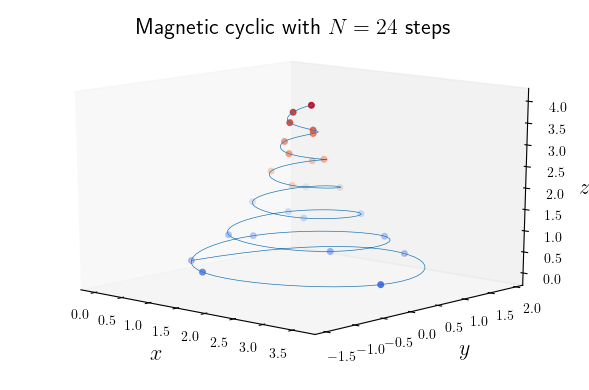

In [8]:
magnetic_cyclic = MagneticCylic('csv/magnetic_cyclic.csv')
magnetic_cyclic.solve_with_settings(nsteps=24)

# # Interactive:
# matplotlib_notebook()
magnetic_cyclic.visualize()

> 散点的颜色由冷（蓝色）到暖（红色），表征时间的流逝。

由上可见，迭代步数过小时，解存在衰减现象；增大迭代步数，有：

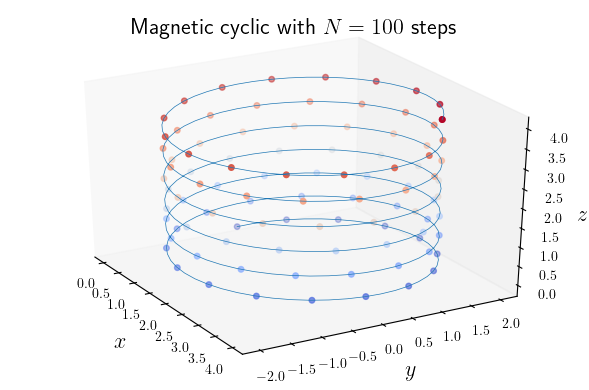

In [9]:
magnetic_cyclic.solve_with_settings(nsteps=100)

# # Interactive:
# matplotlib_notebook()
magnetic_cyclic.visualize(angle=(30, -30))

此时解已经基本上是等距螺线了，进一步增大步数，有：

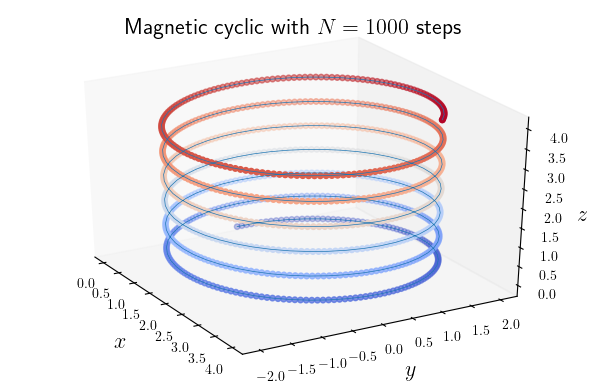

In [10]:
magnetic_cyclic.solve_with_settings(nsteps=1000)

# # Interactive:
# matplotlib_notebook()
magnetic_cyclic.visualize(angle=(30, -30))

可见，对这一问题而言，RK4 方法的收敛速度是很快的，远快于欧拉法。
### (b) 带非齐次项的二阶 ODE
问题如下：

In [11]:
from initial_value_problem import EqWithExternalForce
EqWithExternalForce.__init__??

Source:
    def __init__(self, file_path):
        self.problem = InitialValueProblem(
            lambda: (
                lambda y: y[2],
                lambda y: np.exp(2 * y[0]) * np.sin(y[0]) + 2 * (y[2] - y[1])
            ),
            initial_values=(0., -.4, -.6)
        )
        self.columns = ['t', 'y', 'v_y']
        self.file_path = file_path
        super().__init__(
            columns=self.columns, file_path=file_path, header=None
        )
File:      /run/media/bryan/Resources/Documents/Notes/2018年春/计算物理/PKUComputationalPhysics/ex4/pycode/initial_value_problem.py
Type:      function


不难发现，方程有严格解：
$$
y = \frac{1}{5}\,e^{2t}\pqty{\sin t - 2\cos t}
$$
采用 RK4 方法数值求解，结果如下：

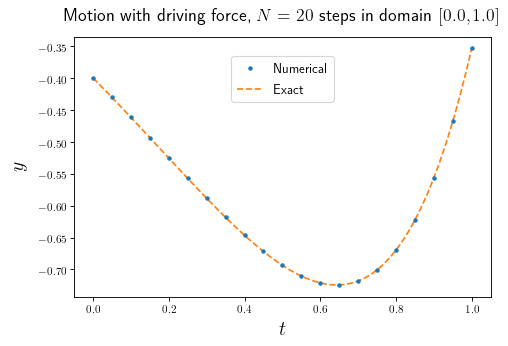

In [12]:
eq_with_external_force = EqWithExternalForce('csv/eq_with_external_force.csv')
eq_with_external_force.solve_with_settings(nsteps=20)
%matplotlib inline
eq_with_external_force.visualize()

可见，区区 20 点的迭代已经能够非常好地给出所求的解。

此外，注意到方程的驱动力是指数增大的，因此解的振荡也将指数增大；自然，我们关心大 $t$ 时 RK4 的表现，结果如下：

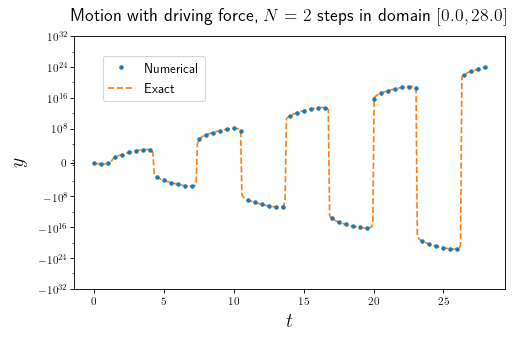

In [13]:
eq_with_external_force.solve_with_settings(nsteps=2, endpoint=28.)
%matplotlib inline
eq_with_external_force.visualize(logy=True)

这里的 $y$ 标度采用了 `matplotlib` 的 [`symlog` 选项](https://stackoverflow.com/a/3513150), 通过在原点附近线性连接，以涵盖对数标度的正、负区域。可见，对较大的 $(t, \abs{y})$, RK4 的表现依然很出色，无需担心收敛速度的问题。

### (c) Lorenz 吸引子
方程及初始参数如下：

In [14]:
from initial_value_problem import LorenzAttractor
LorenzAttractor.__init__??

Source:
    def __init__(self, file_path):
        self.params = {
            'sigma': 10,
            'rho': 28,
            'beta': 5 / 3
        }
        self.problem = InitialValueProblem(
            lambda
            sigma=self.params['sigma'],
            rho=self.params['rho'],
            beta=self.params['beta']: (
                lambda y: - beta * y[1] + y[2] * y[3],
                lambda y: - sigma * y[2] + sigma * y[3],
                lambda y: - y[2] * y[1] + rho * y[2] - y[3]
            ),
            initial_values=(0., 12., 4., 0.)
        )
        self.columns = ['t', 'x', 'y', 'z']
        self.file_path = file_path
        super().__init__(
            columns=self.columns, file_path=file_path, header=None
        )
File:      /run/media/bryan/Resources/Documents/Notes/2018年春/计算物理/PKUComputationalPhysics/ex4/pycode/initial_value_problem.py
Type:      function


按默认参数求解，结果如下：

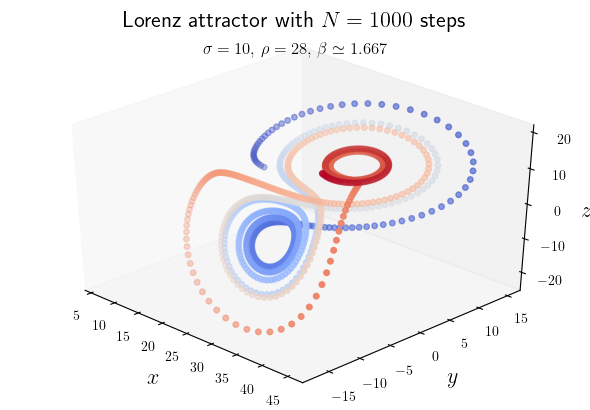

In [15]:
lorenz_attractor = LorenzAttractor('csv/lorenz_attractor.csv')
lorenz_attractor.solve_with_settings()

# # Interactive:
# matplotlib_notebook()
lorenz_attractor.visualize()

吸引子的结构清晰可见；改变参数，可得不同形态的结构：

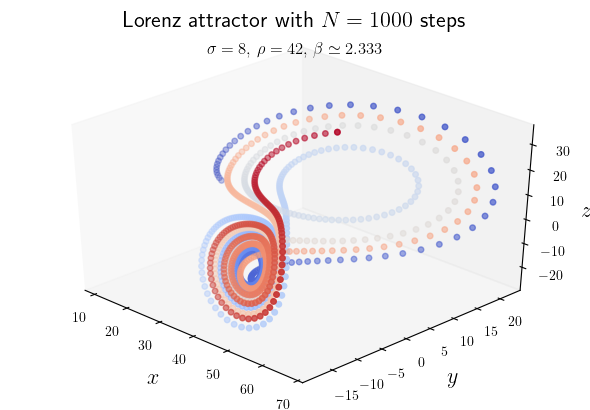

In [16]:
lorenz_attractor.solve_with_settings(sigma=8, rho=42, beta=(7/3))

# # Interactive:
# matplotlib_notebook()
lorenz_attractor.visualize()

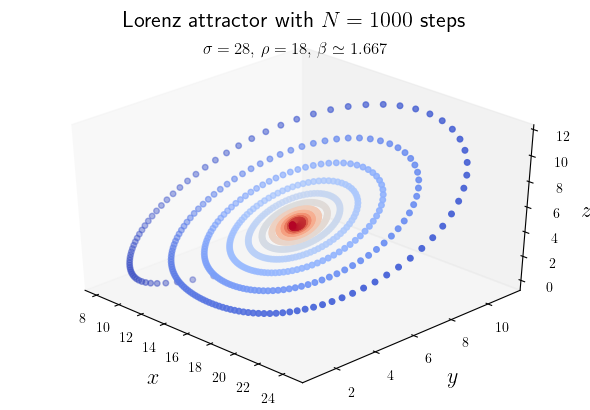

In [17]:
lorenz_attractor.solve_with_settings(sigma=28, rho=18, beta=(5/3))

# # Interactive:
# matplotlib_notebook()
lorenz_attractor.visualize()

关于解对参数的依赖，可参见本人的[计算概论小课题报告](latex/ref.pdf), p.13. 

## 2. 边值问题
理论分析：

In [18]:
pdfGet('latex/sections/shooting_method.pdf').show()

在上述讨论的基础上设计算法。首先，约定边值的输入格式为：
$$
\begin{align}
(A, \vec{b}) = \Big(\, \big(\ 
        &(a_{11}, a_{12}, \cdots, a_{10}),\\
        &(a_{21}, a_{22}, \cdots, a_{20}),\\
        &\cdots,\\
        &(a_{n-1, 1}, a_{n-1, 2}, \cdots, a_{n-1, 0})
    \ \big),\\
    &\!\!(b_1, b_2, \cdots, b_n, b_0)
\Big)
\end{align}
$$
初始化 `SimpleBVPbyShooting` 如下：

In [19]:
from toolkit.dsolve import SimpleBVPbyShooting
show_docstring(SimpleBVPbyShooting)
SimpleBVPbyShooting.__init__??

***Docstring: ***

```python
    """ Simplified Boundary Value Problem, solved by shooting method,
        a.k.a. by converting it to InitialValueProblem,
        along with a lot of trial and error.
        SEE InitialValueProblem for more info.

    Args:
        domain: simple interval (left, right);
        boundary_constraints: 2 sides,
            @left: (n - 1) constraints,
                a11 * y1a + a12 * y2a + ... = a10,
                a21 * y1a + a22 * y2a + ... = a20,
                    ...
            @right: ONLY 1 constraint,
                b1 * y1b + b2 * y2b + ... = b0,
            ... wrapped in 2-level tuple:
            (
                ( (a11, a12, ... , a10),
                  (a21, a22, ... , a20),
                  ...
                  (a[n-1]1, a[n-11]2, ... , a[n-1]0)
                ),                  # (n-1) * (n+1) MATRIX
                (b1, b2, ... , b0)  # (n+1) tuple
            )

    NOTE: Set domain & boundaries now, or later, whenever u like!
    """
```

Source:
    def __init__(self, func_with_params,
                 domain=None, boundary_constraints=None):
        self.rhs = func_with_params
        self.dim = len(func_with_params())
        self.domain = None if domain is None else \
            self.__check_domain(domain)
        self.boundary = None if boundary_constraints is None else \
            self.__check_boundary(boundary_constraints)
File:      /run/media/bryan/Resources/Documents/Notes/2018年春/计算物理/PKUComputationalPhysics/ex4/pycode/toolkit/dsolve.py
Type:      function


其中 `__check_domain` 和 `__check_boundary` 用于检验定义域和初值的合法性，并将其转化为 `np.array` 类型。

In [20]:
print('Methods:')
get_methods(SimpleBVPbyShooting)

Methods:


('_SimpleBVPbyShooting__check_boundary',
 '_SimpleBVPbyShooting__check_domain',
 '__init__',
 'dsolve_shooting',
 'set_boundary',
 'set_domain')

打靶法的具体求解过程如下:

In [21]:
SimpleBVPbyShooting.dsolve_shooting??

Source:
    def dsolve_shooting(self, h: float,
                        first_guess: (int, float), accuracy_goal=1e-16,
                        output=None, **kwargs) -> list:
        """ Differential solution given certain boundary values, via shooting;
            See docstring for `InitialValueProblem.dsolve_rk4()`.

        Additional Args:
            first_guess: (k: int, y[k]: float),
                guess the initial value of k-th component y[k];
            accuracy_goal: passed to rootfinder `find_root_secant()`,
                as a "stop-iteration" criterion;
        """

        n = self.dim
        boundary_left, boundary_right = self.boundary

        k, yk_guess = first_guess
        if (k not in mrange(1, n)) or (type(yk_guess) is not float):
            raise ValueError('illegal first guess for `dsolve_shooting()`')

        # GUESS an initial value for the k-th component;
        # ... and FIND initial values for other components:
        sq_matrix = np.delete(bounda

**具体说明：**
* 由自由初值 `y[k] = initial_yk` 得到其余初值： `y[i] for i in mrange(1, n)` 的过程由 `initial_values(initial_yk)` 给出，这里需要求解 $(n-1)$ 维线性方程组，这一过程由前已编写的高斯消元法（GEM, or `gem()`）给出；

In [22]:
pager.trim('SimpleBVPbyShooting.dsolve_shooting', (20, 32))

```
*** Excerpt, showing lines[20:32] ```

Source:
        # GUESS an initial value for the k-th component;
        # ... and FIND initial values for other components:
        sq_matrix = np.delete(boundary_left[:, :-1], k - 1, axis=1)

        def initial_values(initial_yk):
            # Solve a (n-1) dimensional matrix!
            rhs_vec = boundary_left[:, -1] \
                - initial_yk * boundary_left[:, (k - 1)]
            return (
                self.domain[0],
                *np.insert(gem(sq_matrix, rhs_vec), k - 1, initial_yk)
            )


```
*** Excerpt, showing lines[20:32] ```

* 进一步，由 a 处初值 $\vec{y}_a$ 到右端（b 处）边值 $\vec{y}_b$ 的过程由 `ivp.dsolve_rk4()` 给出，`ivp` 即代指初值问题；这一过程包含在 `shooting_result()` 当中，返回 $B\vec{y}_b$, `shooting_error()` 则返回 $B\vec{y}_b - \vec{b}_0$. 

In [23]:
pager.trim('SimpleBVPbyShooting.dsolve_shooting', (33, 47))

```
*** Excerpt, showing lines[33:47] ```

Source:
        ivp = InitialValueProblem(self.rhs)

        def shooting_result(initial_yk):
            ivp.set_initial_values(initial_values(initial_yk))
            endpoint_values = ivp.dsolve_rk4(
                h, self.domain[1], shooting_mode=True,
                **kwargs
            )[-1]
            return np.dot(
                boundary_right[:-1], endpoint_values[1:]
            )

        def shooting_error(initial_yk):
            return shooting_result(initial_yk) - boundary_right[-1]


```
*** Excerpt, showing lines[33:47] ```

* 割线法求根，迭代起点 `try1, try2` 手动给出，求根过程包含在前已编写的 `find_root_secant` 当中。
* 返回达到 `accuracy_goal` 精度的零点，得最佳初始参数 `best_init`, 最后完整运行一次 `dsolve_rk4()` 得解。

In [24]:
pager.trim('SimpleBVPbyShooting.dsolve_shooting', (48, None))

```
*** Excerpt, showing lines[48:None] ```

Source:
        try1 = yk_guess
        try2 = yk_guess * (boundary_right[-1] / shooting_result(try1))
        best_yk = find_root_secant(
            shooting_error, try1, try2, accuracy=accuracy_goal
        )
        best_init = initial_values(best_yk)

        ivp.set_initial_values(best_init)
        return ivp.dsolve_rk4(
            h, self.domain[1], output=output,
            **kwargs
        )
File:      /run/media/bryan/Resources/Documents/Notes/2018年春/计算物理/PKUComputationalPhysics/ex4/pycode/toolkit/dsolve.py
Type:      function


```
*** Excerpt, showing lines[48:None] ```

---
工具准备就绪，下面考察具体问题：一维点电荷的势场，边界处势场固定为零；物理上，这一环境相当于两接地平板之间有一带电绝缘板，三者平行。首先，一维点电荷（三维无限大平板）构造如下：

In [25]:
from point_source_problem import point_source
point_source??

Source:
def point_source(center, half_width, charge):

    def distribution(x):
        return charge / (2 * half_width) \
            if abs(x - center) < half_width else 0.

    return distribution
File:      /run/media/bryan/Resources/Documents/Notes/2018年春/计算物理/PKUComputationalPhysics/ex4/pycode/point_source_problem.py
Type:      function


这里以方波近似电荷分布；方程初始化如下：

In [26]:
from point_source_problem import PointChargePotential
PointChargePotential.__init__??

Source:
    def __init__(self, file_path):
        self.params = {
            'half_width': .05
        }
        self.problem = SimpleBVPbyShooting(
            lambda half_width=self.params['half_width']: (
                lambda y: - y[2],
                lambda y: - point_source(
                    center=.4, half_width=half_width, charge=1.
                )(y[0])
            ),
            domain=(0., 1.),
            boundary_constraints=(
                ((1., 0., 0.),),
                (1., 0., 0.)
            )
        )
        self.columns = ['x', 'y', 'Dy']
        self.file_path = file_path
        super().__init__(
            columns=self.columns, file_path=file_path, header=None
        )
File:      /run/media/bryan/Resources/Documents/Notes/2018年春/计算物理/PKUComputationalPhysics/ex4/pycode/point_source_problem.py
Type:      function


注意，由于 `y[1]` $= y^{(1)} = 0$ 已经定死，打靶时的初值自由变量必须选为 `y[2]` $= y^{(2)} = \operatorname{D}{y^{(1)}}$. 

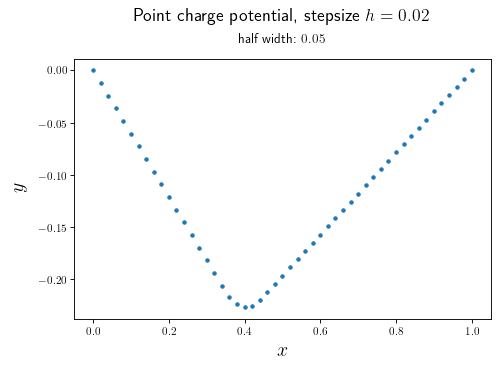

In [27]:
point_charge_potential = PointChargePotential('csv/point_charge_potential.csv')
point_charge_potential.solve_with_settings()
%matplotlib inline
point_charge_potential.visualize()

可见，数值解与我们期待的线性结果基本一致；电荷附近的曲线有一点圆角，这是由于电荷分布具有显著的半宽（`half_width` $= 0.05$），缩小电荷分布的半宽和求解步长，可得：

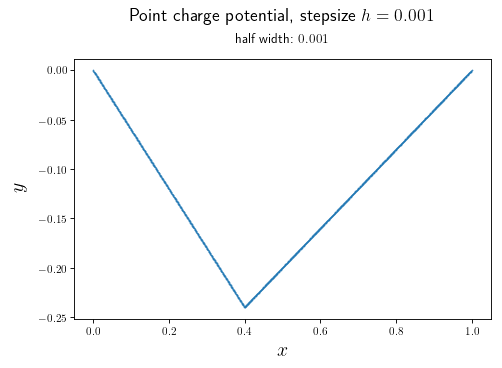

In [28]:
point_charge_potential.solve_with_settings(h=.001, half_width=.001)
%matplotlib inline
point_charge_potential.visualize(pointsize=1)

完美！作负梯度图（对应场强），有：

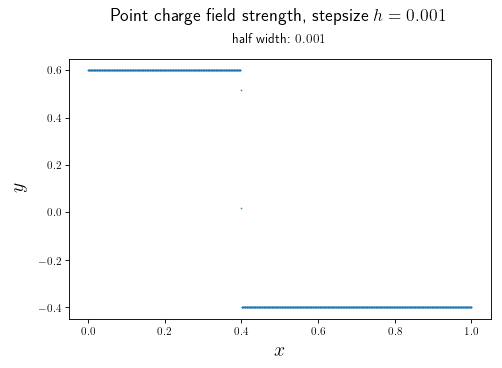

In [29]:
%matplotlib inline
point_charge_potential.visualize(pointsize=1, plot_Dy=True)

若半宽较大，则在点电荷分布范围内，场强线性变化，如下：

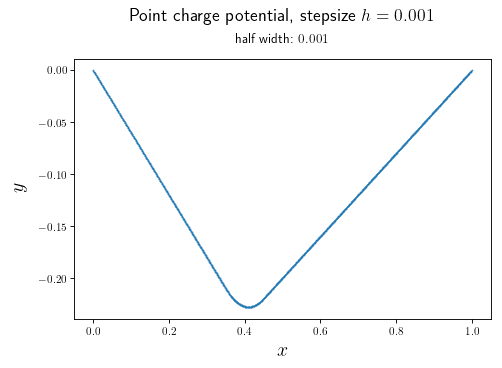

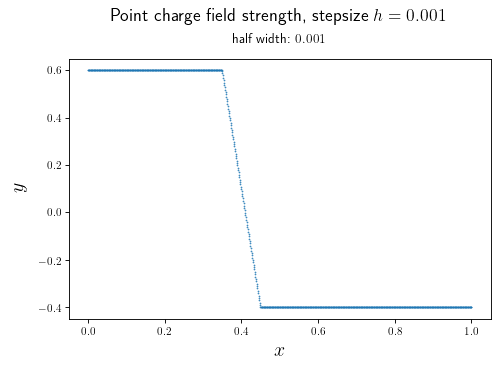

In [30]:
point_charge_potential.solve_with_settings(h=.001)
%matplotlib inline
point_charge_potential.visualize(pointsize=1)
point_charge_potential.visualize(pointsize=1, plot_Dy=True)

In [31]:
goodbye('ex4')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook ex4.ipynb to script
